<a href="https://colab.research.google.com/github/bonareri/Machine_Learning_1/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#importing the libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Loading data
housing_data = pd.read_csv('/content/Housing.csv')
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
#checking missing values
housing_data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


## Data Prepocessing

In [14]:
housing_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [15]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [25]:
# Checking unique values for different columns
print("Unique values for mainroad:", housing_data['mainroad'].unique())
print("Unique values for guestroom:", housing_data['guestroom'].unique())
print("Unique values for basement:", housing_data['basement'].unique())
print("Unique values for hotwaterheating:", housing_data['hotwaterheating'].unique())
print("Unique values for airconditioning:", housing_data['airconditioning'].unique())
print("Unique values for prefarea:", housing_data['prefarea'].unique())
print("Unique values for furnishingstatus:", housing_data['furnishingstatus'].unique())



Unique values for mainroad: ['yes' 'no']
Unique values for guestroom: ['no' 'yes']
Unique values for basement: ['no' 'yes']
Unique values for hotwaterheating: ['no' 'yes']
Unique values for airconditioning: ['yes' 'no']
Unique values for prefarea: ['yes' 'no']
Unique values for furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


### Encoding

In [27]:
import pandas as pd

# Convert 'yes'/'no' columns to binary using pd.get_dummies
binary_columns = ['mainroad', 'guestroom', 'basement',
                  'hotwaterheating', 'airconditioning', 'prefarea']
housing_data = pd.get_dummies(housing_data, columns=binary_columns, drop_first=True)

# Apply one-hot encoding for 'furnishingstatus' (3 categories)
housing_data = pd.get_dummies(housing_data, columns=['furnishingstatus'], drop_first=True)

# View the transformed data
print(housing_data.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True  

### Data Analysis

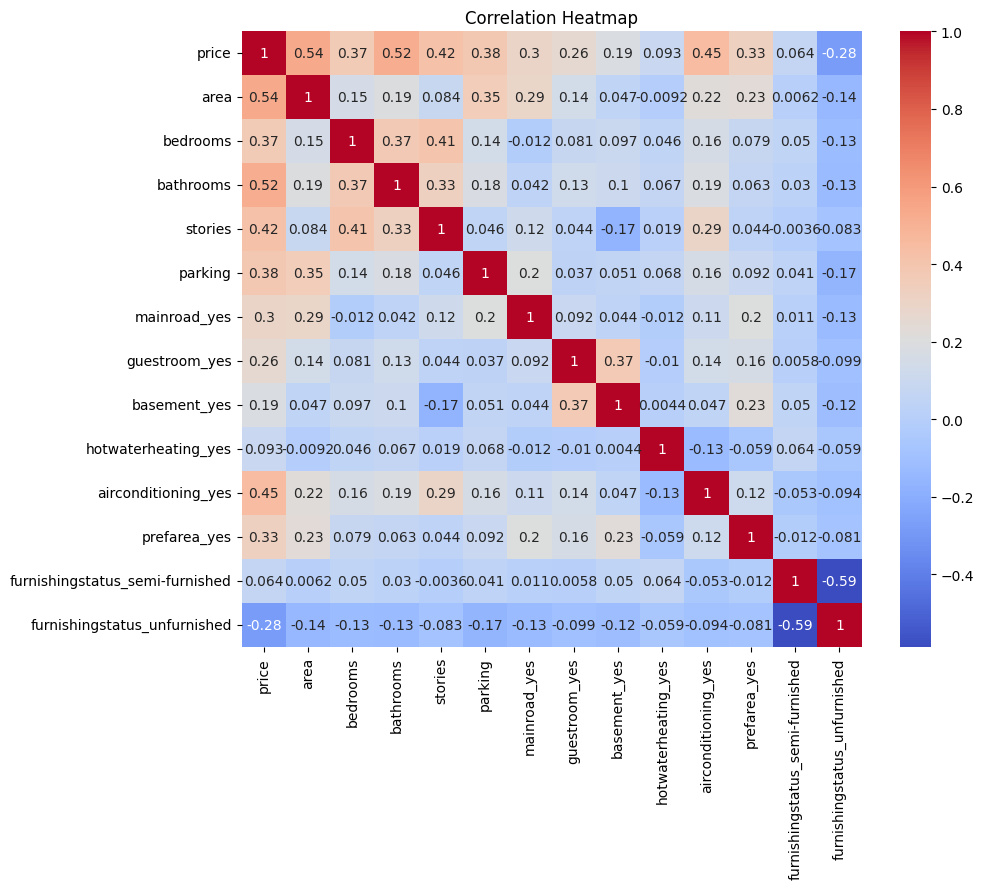

In [28]:
# checking correlation using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

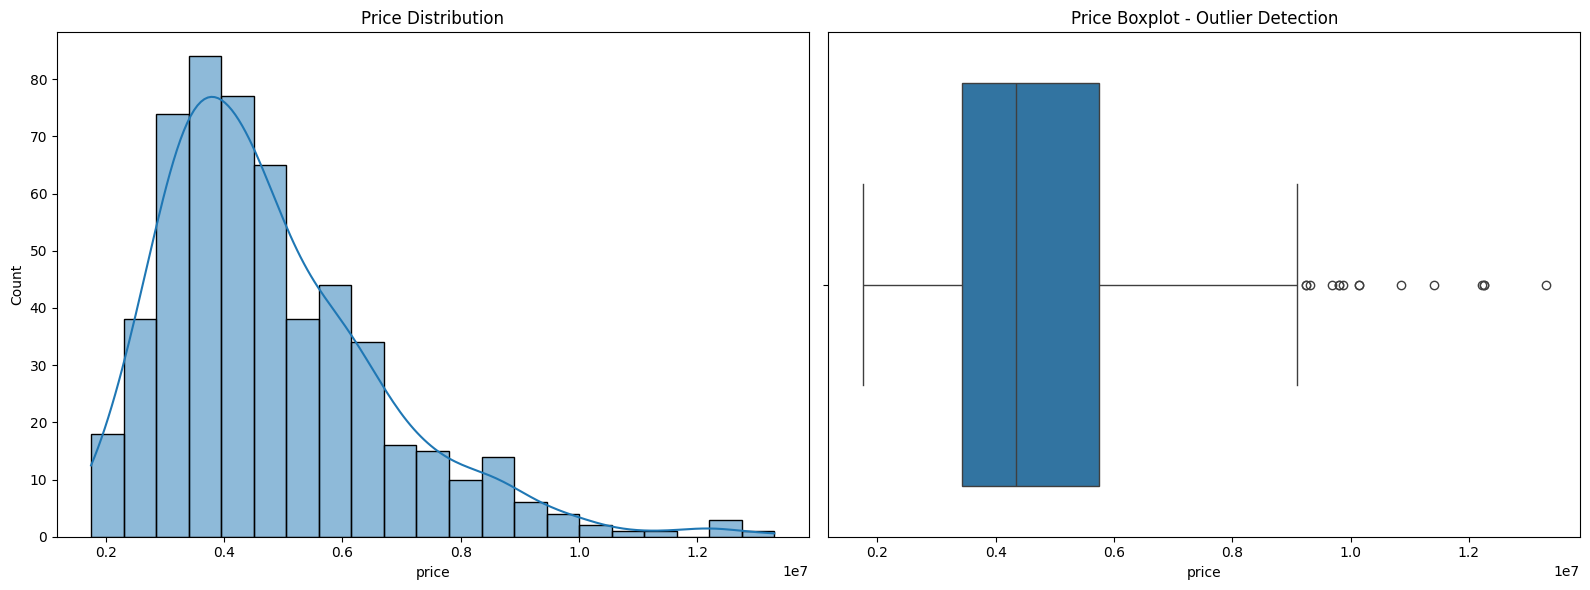

In [29]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the histogram with KDE on the first subplot
sns.histplot(housing_data['price'], kde=True, ax=axes[0])
axes[0].set_title('Price Distribution')

# Plotting the boxplot on the second subplot
sns.boxplot(x=housing_data['price'], ax=axes[1])
axes[1].set_title('Price Boxplot - Outlier Detection')

# Display the plots
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

### Modelling

### Linear Regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Separate features (X) and target (y)
X = housing_data.drop(columns=['price'])  # Drop the target column
y = housing_data['price']  # Target variable

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and Train the Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 4. Make Predictions
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

# 5. Evaluate the Model
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the Results
print(f"Training Results:")
print(f"Linear Regression MSE (Train): {mse_train:.4f}")
print(f"Linear Regression MAE (Train): {mae_train:.4f}")
print(f"Linear Regression R^2 (Train): {r2_train:.4f}")

print(f"\nTesting Results:")
print(f"Linear Regression MSE (Test): {mse_test:.4f}")
print(f"Linear Regression MAE (Test): {mae_test:.4f}")
print(f"Linear Regression R^2 (Test): {r2_test:.4f}")

Training Results:
Linear Regression MSE (Train): 968358188440.7242
Linear Regression MAE (Train): 719242.8937
Linear Regression R^2 (Train): 0.6859

Testing Results:
Linear Regression MSE (Test): 1754318687330.6638
Linear Regression MAE (Test): 970043.4039
Linear Regression R^2 (Test): 0.6529


### Ridge Regression

In [38]:
from sklearn.linear_model import Ridge

# Initialize and train Ridge Regression model with alpha=1.0
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make Predictions
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Model
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)

mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

# Print the Results
print(f"Training Results with Ridge Regression:")
print(f"Ridge Regression MSE (Train): {mse_train_ridge:.4f}")
print(f"Ridge Regression MAE (Train): {mae_train_ridge:.4f}")
print(f"Ridge Regression R^2 (Train): {r2_train_ridge:.4f}")

print(f"\nTesting Results with Ridge Regression:")
print(f"Ridge Regression MSE (Test): {mse_test_ridge:.4f}")
print(f"Ridge Regression MAE (Test): {mae_test_ridge:.4f}")
print(f"Ridge Regression R^2 (Test): {r2_test_ridge:.4f}")

Training Results with Ridge Regression:
Ridge Regression MSE (Train): 968476252847.7878
Ridge Regression MAE (Train): 718377.1461
Ridge Regression R^2 (Train): 0.6859

Testing Results with Ridge Regression:
Ridge Regression MSE (Test): 1756474279575.2856
Ridge Regression MAE (Test): 970245.6822
Ridge Regression R^2 (Test): 0.6525


### Lasso Regression

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Lasso Regression model with alpha=1.0
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)

# Make Predictions
y_train_pred_lasso = lasso_model.predict(X_train_scaled)
y_test_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the Model
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
mae_train_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
mae_test_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Print the Results
print(f"Training Results with Lasso Regression:")
print(f"Lasso Regression MSE (Train): {mse_train_lasso:.4f}")
print(f"Lasso Regression MAE (Train): {mae_train_lasso:.4f}")
print(f"Lasso Regression R^2 (Train): {r2_train_lasso:.4f}")

print(f"\nTesting Results with Lasso Regression:")
print(f"Lasso Regression MSE (Test): {mse_test_lasso:.4f}")
print(f"Lasso Regression MAE (Test): {mae_test_lasso:.4f}")
print(f"Lasso Regression R^2 (Test): {r2_test_lasso:.4f}")

Training Results with Lasso Regression:
Lasso Regression MSE (Train): 968358188449.4161
Lasso Regression MAE (Train): 719242.7128
Lasso Regression R^2 (Train): 0.6859

Testing Results with Lasso Regression:
Lasso Regression MSE (Test): 1754319994370.2712
Lasso Regression MAE (Test): 970043.4057
Lasso Regression R^2 (Test): 0.6529


### Elastic Net Regression

In [56]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train ElasticNet model with alpha=1.0 and l1_ratio=0.5 (a common default balance)
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_model.fit(X_train_scaled, y_train)

# Make Predictions
y_train_pred_en = elastic_net_model.predict(X_train_scaled)
y_test_pred_en = elastic_net_model.predict(X_test_scaled)

# Evaluate the Model
mse_train_en = mean_squared_error(y_train, y_train_pred_en)
mae_train_en = mean_absolute_error(y_train, y_train_pred_en)
r2_train_en = r2_score(y_train, y_train_pred_en)

mse_test_en = mean_squared_error(y_test, y_test_pred_en)
mae_test_en = mean_absolute_error(y_test, y_test_pred_en)
r2_test_en = r2_score(y_test, y_test_pred_en)

# Print the Results
print(f"Training Results with Elastic Net Regression:")
print(f"Elastic Net MSE (Train): {mse_train_en:.4f}")
print(f"Elastic Net MAE (Train): {mae_train_en:.4f}")
print(f"Elastic Net R^2 (Train): {r2_train_en:.4f}")

print(f"\nTesting Results with Elastic Net Regression:")
print(f"Elastic Net MSE (Test): {mse_test_en:.4f}")
print(f"Elastic Net MAE (Test): {mae_test_en:.4f}")
print(f"Elastic Net R^2 (Test): {r2_test_en:.4f}")

Training Results with Elastic Net Regression:
Elastic Net MSE (Train): 1052735100993.7308
Elastic Net MAE (Train): 733153.7523
Elastic Net R^2 (Train): 0.6586

Testing Results with Elastic Net Regression:
Elastic Net MSE (Test): 1993228920637.3289
Elastic Net MAE (Test): 1004041.6090
Elastic Net R^2 (Test): 0.6057


In [45]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [46]:
housing_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [47]:
import pandas as pd

# New house features (example) based on the provided columns
new_house = {
    'area': 7420,
    'bedrooms': 4,
    'bathrooms': 2,
    'stories': 3,
    'parking': 2,
    'mainroad_yes': 1,  # mainroad is encoded as 1 (yes) or 0 (no)
    'guestroom_yes': 0,  # guestroom is encoded as 1 (yes) or 0 (no)
    'basement_yes': 0,   # basement is encoded as 1 (yes) or 0 (no)
    'hotwaterheating_yes': 0,  # hotwaterheating is encoded as 1 (yes) or 0 (no)
    'airconditioning_yes': 1,  # airconditioning is encoded as 1 (yes) or 0 (no)
    'prefarea_yes': 1,  # prefarea is encoded as 1 (yes) or 0 (no)
    'furnishingstatus_semi-furnished': 0,  # furnishing status encoded as 1 (semi-furnished) or 0 (other)
    'furnishingstatus_unfurnished': 0,    # furnishing status encoded as 1 (unfurnished) or 0 (other)
}

# Convert the dictionary to a DataFrame
new_house_df = pd.DataFrame([new_house])

# Ensure the new house data has the same columns as the training data (excluding 'price')
new_house_df = new_house_df[housing_data.drop('price', axis=1).columns]

# Apply any necessary preprocessing (e.g., scaling, encoding) to the new house data
# If you used a scaler or encoder during training, ensure it's applied here.
# For example, if you used StandardScaler during training:
new_house_df_scaled = scaler.transform(new_house_df)

# Predict the price for the new house
predicted_price = model.predict(new_house_df)

# Output the predicted price
print(f"The predicted price for the new house is: {predicted_price[0]}")

The predicted price for the new house is: 7968276.12638738


In [ ]:
housing_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')